In [89]:
from Scripts.utils.pd_feature_preprocessing_funcs import *

In [90]:
final_separate_dataset_path = '../../Study/Data/features/normalised/'

# Data Preprocessing
This notebook goes through the initial cleaning and preprocessing of the whole and windowed pd data. It also creates a new combined dataset which is also cleaned and normalised.

In [91]:
all_dataset_paths = get_all_dataset_paths('raw')

In [92]:
dataset_path = all_dataset_paths[0]

'../../Study/Data/features/raw/pd_500-500-windows_extracted_features.csv'

In [ ]:
dataset_path

## Initial Cleaning

In [94]:
dataset_name = dataset_path.split('/')[-1:][0].split('_')[1]

In [95]:
dataset_name

'1000-1000-windows'

In [96]:
dataset_df = pd.read_csv(dataset_path)

In [97]:
dataset_df

,ID,State,Hand,Medication,Light,Median_SigComplete_VT,Range_SigComplete_VT,RMS_SigComplete_VT,RMSratio_SigComplete_VT,FirstDerivativeMean_SigComplete_VT,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,ax,healthy,r,NaN,1,500.0,999.0,577.312747,1.083662e+04,345.169435,...,52.043118,52.043118,0.009573,1.216063e-09,2.955325e-13,6.969008,57.810690,0.000000,0.03,1.7114
1,ax,healthy,r,NaN,1,1499.0,1000.0,1526.713251,3.120261e+04,344.370861,...,52.042975,52.042975,0.000569,6.437378e-12,1.668400e-16,10.214959,126.005035,0.000000,0.05,1.4484
2,ax,healthy,r,NaN,0,3003.0,1000.0,3017.569096,5.514470e+04,344.370861,...,52.042975,52.042975,0.000529,6.205966e-12,1.524907e-16,9.863460,111.632717,0.000000,0.05,1.8116
3,ax,healthy,r,NaN,0,4004.0,999.0,4014.346940,6.705887e+04,345.169435,...,52.043118,52.043118,0.000342,1.960482e-12,3.163490e-17,11.524501,165.291359,0.000000,0.06,2.1609
4,ax,healthy,r,NaN,0,5003.0,1000.0,5011.422090,8.136871e+04,344.941957,...,52.043046,52.043046,0.000213,5.363088e-13,3.338446e-18,8.500059,89.451467,0.000000,0.06,2.2911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,ba,healthy,r,NaN,0,119692.5,1001.0,119692.701942,1.435909e+06,345.286899,...,52.043046,52.043046,0.000729,1.319570e-11,5.444531e-16,11.358256,148.850187,0.000000,0.08,4.1968
11202,ba,healthy,r,NaN,0,120693.0,999.0,120692.808242,1.461265e+06,345.169435,...,52.043118,52.043118,0.000332,1.270201e-12,1.025853e-17,7.165998,60.277542,0.000000,0.08,4.1136
11203,ba,healthy,r,NaN,0,121692.5,1001.0,121692.774530,1.503945e+06,345.286899,...,52.043046,52.043046,0.000290,7.972683e-13,4.638810e-18,6.516281,55.599072,0.000000,0.08,3.9546
11204,ba,healthy,r,NaN,1,122903.0,1000.0,122904.325173,1.477136e+05,346.666667,...,52.043261,52.043261,7.510806,1.227483e-03,2.896701e-04,6.735664,50.352760,0.013311,0.08,416.0713


In [98]:
# Changing the class column names & changing values in class columns to binary (1/0 = PD/H, 1 = On/Off)
dataset_df.rename(columns={'State': 'PD_Class', 'Medication': 'Medication_Class'}, inplace=True)

In [99]:
dataset_df['PD_Class'] = dataset_df['PD_Class'].replace('healthy', 0)
dataset_df['PD_Class'] = dataset_df['PD_Class'].replace('pd', 1)
dataset_df['Medication_Class'] = dataset_df['Medication_Class'].replace('off', 0)
dataset_df['Medication_Class'] = dataset_df['Medication_Class'].replace('on', 1)
dataset_df['Medication_Class'] = dataset_df['Medication_Class'].fillna(-1).astype(int)

/var/folders/xq/18z65by97_b4nsc6115y_3nw0000gn/T/ipykernel_61691/423450421.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df['PD_Class'] = dataset_df['PD_Class'].replace('pd', 1)
/var/folders/xq/18z65by97_b4nsc6115y_3nw0000gn/T/ipykernel_61691/423450421.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_df['Medication_Class'] = dataset_df['Medication_Class'].replace('on', 1)


In [100]:
dataset_df

,ID,PD_Class,Hand,Medication_Class,Light,Median_SigComplete_VT,Range_SigComplete_VT,RMS_SigComplete_VT,RMSratio_SigComplete_VT,FirstDerivativeMean_SigComplete_VT,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,ax,0,r,-1,1,500.0,999.0,577.312747,1.083662e+04,345.169435,...,52.043118,52.043118,0.009573,1.216063e-09,2.955325e-13,6.969008,57.810690,0.000000,0.03,1.7114
1,ax,0,r,-1,1,1499.0,1000.0,1526.713251,3.120261e+04,344.370861,...,52.042975,52.042975,0.000569,6.437378e-12,1.668400e-16,10.214959,126.005035,0.000000,0.05,1.4484
2,ax,0,r,-1,0,3003.0,1000.0,3017.569096,5.514470e+04,344.370861,...,52.042975,52.042975,0.000529,6.205966e-12,1.524907e-16,9.863460,111.632717,0.000000,0.05,1.8116
3,ax,0,r,-1,0,4004.0,999.0,4014.346940,6.705887e+04,345.169435,...,52.043118,52.043118,0.000342,1.960482e-12,3.163490e-17,11.524501,165.291359,0.000000,0.06,2.1609
4,ax,0,r,-1,0,5003.0,1000.0,5011.422090,8.136871e+04,344.941957,...,52.043046,52.043046,0.000213,5.363088e-13,3.338446e-18,8.500059,89.451467,0.000000,0.06,2.2911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,ba,0,r,-1,0,119692.5,1001.0,119692.701942,1.435909e+06,345.286899,...,52.043046,52.043046,0.000729,1.319570e-11,5.444531e-16,11.358256,148.850187,0.000000,0.08,4.1968
11202,ba,0,r,-1,0,120693.0,999.0,120692.808242,1.461265e+06,345.169435,...,52.043118,52.043118,0.000332,1.270201e-12,1.025853e-17,7.165998,60.277542,0.000000,0.08,4.1136
11203,ba,0,r,-1,0,121692.5,1001.0,121692.774530,1.503945e+06,345.286899,...,52.043046,52.043046,0.000290,7.972683e-13,4.638810e-18,6.516281,55.599072,0.000000,0.08,3.9546
11204,ba,0,r,-1,1,122903.0,1000.0,122904.325173,1.477136e+05,346.666667,...,52.043261,52.043261,7.510806,1.227483e-03,2.896701e-04,6.735664,50.352760,0.013311,0.08,416.0713


## Null Value Cleaning

### Data Null Counts

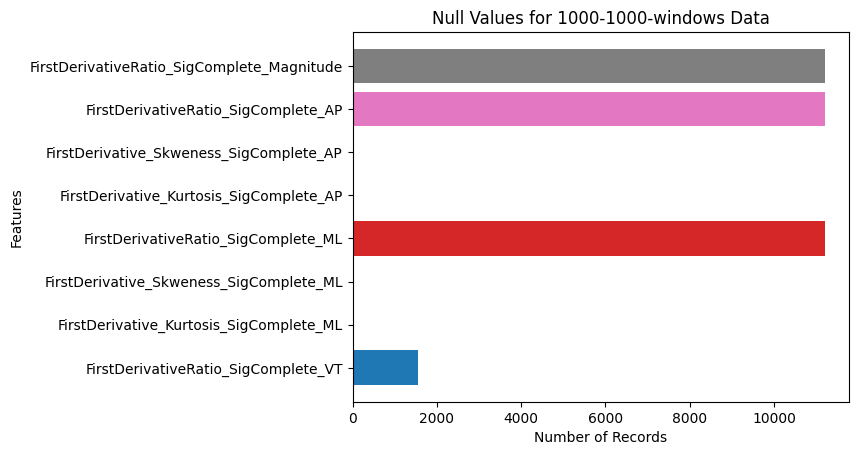

Number of features with at least one Null value for 1000-1000-windows data: 8


In [101]:
dataset_null_df = null_count_plots(dataset_df, 4, dataset_name)

In [102]:
dataset_null_df

,FirstDerivativeRatio_SigComplete_VT,FirstDerivative_Kurtosis_SigComplete_ML,FirstDerivative_Skweness_SigComplete_ML,FirstDerivativeRatio_SigComplete_ML,FirstDerivative_Kurtosis_SigComplete_AP,FirstDerivative_Skweness_SigComplete_AP,FirstDerivativeRatio_SigComplete_AP,FirstDerivativeRatio_SigComplete_Magnitude
Null Counts 1000-1000-windows,1557,1,1,11206,2,2,11206,11206


### Removal of Null Value Records

In [103]:
# Removes all null value features
dataset_df = dataset_df.drop(columns=dataset_null_df.columns.tolist())

In [104]:
dataset_df

,ID,PD_Class,Hand,Medication_Class,Light,Median_SigComplete_VT,Range_SigComplete_VT,RMS_SigComplete_VT,RMSratio_SigComplete_VT,FirstDerivativeMean_SigComplete_VT,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,ax,0,r,-1,1,500.0,999.0,577.312747,1.083662e+04,345.169435,...,52.043118,52.043118,0.009573,1.216063e-09,2.955325e-13,6.969008,57.810690,0.000000,0.03,1.7114
1,ax,0,r,-1,1,1499.0,1000.0,1526.713251,3.120261e+04,344.370861,...,52.042975,52.042975,0.000569,6.437378e-12,1.668400e-16,10.214959,126.005035,0.000000,0.05,1.4484
2,ax,0,r,-1,0,3003.0,1000.0,3017.569096,5.514470e+04,344.370861,...,52.042975,52.042975,0.000529,6.205966e-12,1.524907e-16,9.863460,111.632717,0.000000,0.05,1.8116
3,ax,0,r,-1,0,4004.0,999.0,4014.346940,6.705887e+04,345.169435,...,52.043118,52.043118,0.000342,1.960482e-12,3.163490e-17,11.524501,165.291359,0.000000,0.06,2.1609
4,ax,0,r,-1,0,5003.0,1000.0,5011.422090,8.136871e+04,344.941957,...,52.043046,52.043046,0.000213,5.363088e-13,3.338446e-18,8.500059,89.451467,0.000000,0.06,2.2911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,ba,0,r,-1,0,119692.5,1001.0,119692.701942,1.435909e+06,345.286899,...,52.043046,52.043046,0.000729,1.319570e-11,5.444531e-16,11.358256,148.850187,0.000000,0.08,4.1968
11202,ba,0,r,-1,0,120693.0,999.0,120692.808242,1.461265e+06,345.169435,...,52.043118,52.043118,0.000332,1.270201e-12,1.025853e-17,7.165998,60.277542,0.000000,0.08,4.1136
11203,ba,0,r,-1,0,121692.5,1001.0,121692.774530,1.503945e+06,345.286899,...,52.043046,52.043046,0.000290,7.972683e-13,4.638810e-18,6.516281,55.599072,0.000000,0.08,3.9546
11204,ba,0,r,-1,1,122903.0,1000.0,122904.325173,1.477136e+05,346.666667,...,52.043261,52.043261,7.510806,1.227483e-03,2.896701e-04,6.735664,50.352760,0.013311,0.08,416.0713


##  Z Value Normalisation

In [105]:
# Performing z value normalisation of dataset
norm_dataset_df = z_normalise_df(dataset_df, 4).dropna(axis=1)

/opt/homebrew/lib/python3.11/site-packages/numpy-1.26.4-py3.11-macosx-14-arm64.egg/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Final Normalised Dataset

In [106]:
norm_dataset_df

,ID,PD_Class,Hand,Medication_Class,Light,Median_SigComplete_VT,Range_SigComplete_VT,RMS_SigComplete_VT,RMSratio_SigComplete_VT,FirstDerivativeMean_SigComplete_VT,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,ax,0,r,-1,1.522929,-1.625195,-1.321838,-1.622976,-0.670187,-1.111409,...,-0.883703,-0.883703,-0.269050,-0.148075,-0.09569,-1.374926,-1.228031,-0.770156,-0.243255,-0.304437
1,ax,0,r,-1,1.522929,-1.593312,0.170306,-1.592673,-0.655591,-1.667275,...,-1.666902,-1.666902,-0.272148,-0.148075,-0.09569,-0.198773,-0.225602,-0.770156,-0.025713,-0.306175
2,ax,0,r,-1,-0.656629,-1.545312,0.170306,-1.545088,-0.638432,-1.667275,...,-1.666902,-1.666902,-0.272162,-0.148075,-0.09569,-0.326137,-0.436869,-0.770156,-0.025713,-0.303775
3,ax,0,r,-1,-0.656629,-1.513365,-1.321838,-1.513272,-0.629893,-1.111409,...,-0.883703,-0.883703,-0.272226,-0.148075,-0.09569,0.275733,0.351891,-0.770156,0.083059,-0.301466
4,ax,0,r,-1,-0.656629,-1.481482,0.170306,-1.481448,-0.619637,-1.269751,...,-1.275951,-1.275951,-0.272271,-0.148075,-0.09569,-0.820157,-0.762925,-0.770156,0.083059,-0.300606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11201,ba,0,r,-1,-0.656629,2.178823,1.662451,2.178959,0.351147,-1.029646,...,-1.275951,-1.275951,-0.272093,-0.148075,-0.09569,0.215494,0.110212,-0.770156,0.300601,-0.288011
11202,ba,0,r,-1,-0.656629,2.210754,-1.321838,2.210881,0.369319,-1.111409,...,-0.883703,-0.883703,-0.272230,-0.148075,-0.09569,-1.303547,-1.191769,-0.770156,0.300601,-0.288561
11203,ba,0,r,-1,-0.656629,2.242653,1.662451,2.242798,0.399907,-1.029646,...,-1.275951,-1.275951,-0.272244,-0.148075,-0.09569,-1.538969,-1.260541,-0.770156,0.300601,-0.289612
11204,ba,0,r,-1,1.522929,2.281286,0.170306,2.281468,-0.572088,-0.069227,...,-0.095292,-0.095292,2.312004,0.450367,0.00268,-1.459477,-1.337660,0.532654,0.300601,2.433987


### Saving to CSV

In [107]:
norm_dataset_df.to_csv(final_separate_dataset_path + 'pd_' + dataset_name + '_normalised_features.csv', index=False)